## Code Along :: Feature Selection and Logistic regression

## About the Dataset

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

 -  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
       considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that         match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail           that match CHAR
    
    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e. average length of uninterrupted       sequences of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length longest` i.e. length of longest                   uninterrupted sequence of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length total` i.e. sum of length of uninterrupted       sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)



You can read more about dataset [here](https://archive.ics.uci.edu/ml/datasets/spambase)


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
#Loading the Spam data for the mini challenge
#Target variable is the 57 column i.e spam, non-spam classes 
df = pd.read_csv('spambase.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1. Get an overview of your data by using info() and describe() functions of pandas.


In [3]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### 2. Split the data into train and test set and fit the base logistic regression model on train set.

In [5]:
#Dividing the dataset set in train and test set and apply base logistic model
X = df.drop([57],1)
y =df[57]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 3. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.94      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [7]:
# Calculate accuracy , print out the Classification report and Confusion Matrix.
from sklearn.metrics import precision_score,recall_score, roc_auc_score,accuracy_score ,f1_score
print('Accuracy Score is',accuracy_score(y_test,y_pred))
print('f1_score is',f1_score(y_test,y_pred))
print('A precision_score is',precision_score(y_test,y_pred))
print('A recall_score is',recall_score(y_test,y_pred))
print('A roc_auc_score is',roc_auc_score(y_test,y_pred))

Accuracy Score is 0.9319333816075308
f1_score is 0.9166666666666667
A precision_score is 0.9382940108892922
A recall_score is 0.8960138648180243
A roc_auc_score is 0.926862653802047


In [8]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(tp,fp)
print(fn,tn)

517 34
60 770


### 4. Copy dataset df into df1 variable and apply correlation on df1

In [9]:
# Copy df in new variable df1
df1 = df.copy()
correlation = X.corr().unstack()

### 5. As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity), So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [10]:
# Remove Correlated features above 0.75 and then apply logistic model
#correlation1 = X#.sort_values(kind='quicksort')
correlation[(abs(correlation)>0.75) & (abs(correlation) != 1)]

31  33    0.996066
    39    0.848021
33  31    0.996066
    39    0.845359
39  31    0.848021
    33    0.845359
dtype: float64

In [11]:
# corr_var_list#.reset_index()#['level_0'].unique()#.shape

### 6. Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [12]:
# Split the new subset of data and fit the logistic model on training data
X_new = X.drop([33,39],1)
y =df[57]
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size = 0.3, random_state = 42)
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

### 7. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [13]:
# Calculate accuracy , print out the Classification report and Confusion Matrix for new data
print('Accuracy Score is',accuracy_score(y_test1,y_pred1))
print('f1_score is',f1_score(y_test1,y_pred1))
print('A precision_score is',precision_score(y_test1,y_pred1))
print('A recall_score is',recall_score(y_test1,y_pred1))
print('A roc_auc_score is',roc_auc_score(y_test1,y_pred1))

Accuracy Score is 0.9304851556842868
f1_score is 0.9150442477876107
A precision_score is 0.9349005424954792
A recall_score is 0.8960138648180243
A roc_auc_score is 0.9256188727075196


In [14]:
tn,fp,fn,tp = confusion_matrix(y_test1,y_pred1).ravel()
print(tp,fp)
print(fn,tn)

517 36
60 768


### 8. After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test) to see whether we can increase our score. Find the optimum number of features using Chi Square and fit the logistic model on train data.

In [15]:
# Apply Chi Square and fit the logistic model on train data use df dataset
# import packages
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest

# Code starts here
l = [10,15,20,25,30,35,40,45,50,55]
scores = []
for i in l:
    test = SelectKBest(score_func=chi2,k=i)
    X_train2,X_test2,y_train2,y_test2 = train_test_split(X_new,y,test_size = 0.3,random_state = 42)
    X_train2 = test.fit_transform(X_train2,y_train2)
    X_test2 = test.transform(X_test2)
    model2 = LogisticRegression(random_state = 101)
    model2.fit(X_train2,y_train2)
    scores.append(model2.score(X_test2,y_test2))
    max_index = scores.index(max(scores))
    best_k = l[max_index]
    
    

In [16]:
print(best_k,'columns will give the best score which is',max(scores))

55 columns will give the best score which is 0.9304851556842868


In [17]:
test = SelectKBest(score_func=chi2,k=best_k)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_new,y,test_size = 0.3,random_state = 42)
X_train2 = test.fit_transform(X_train2,y_train2)
X_test2 = test.transform(X_test2)
model2 = LogisticRegression(random_state = 101)
model2.fit(X_train2,y_train2)
model2.score(X_test2,y_test2)
y_pred2 = model2.predict(X_test2)

In [18]:
X_train2.shape

(3220, 55)

In [19]:
model2.coef_.max()

3.429815205412069

### 9. Find out the accuracy , print out the Confusion Matrix.

In [20]:
# Calculate accuracy , print out the Confusion Matrix 
# Calculate accuracy , print out the Classification report and Confusion Matrix for new data
print('Accuracy Score is',accuracy_score(y_test2,y_pred2))
print('f1_score is',f1_score(y_test2,y_pred2))
print('A precision_score is',precision_score(y_test2,y_pred2))
print('A recall_score is',recall_score(y_test2,y_pred2))
print('A roc_auc_score is',roc_auc_score(y_test2,y_pred2))

Accuracy Score is 0.9304851556842868
f1_score is 0.9150442477876107
A precision_score is 0.9349005424954792
A recall_score is 0.8960138648180243
A roc_auc_score is 0.9256188727075196


In [21]:
tn,fp,fn,tp = confusion_matrix(y_test1,y_pred1).ravel()
print(tp,fp)
print(fn,tn)

517 36
60 768


### 10. Using chi squared test there is no change in the score and the optimum features that we got is 55. Now lets see if we can increase our score using another feature selection technique called Anova.Find the optimum number of features using Anova and fit the logistic model on train data.

In [22]:
# Apply Chi Square and fit the logistic model on train data use df dataset
# import packages
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest

# Code starts here
l1 = [15,20,25,30,35,40,45,50,55]
scores1 = []
for j in l1:
    test1 = SelectKBest(score_func=f_classif,k=j)
    X_train3,X_test3,y_train3,y_test3 = train_test_split(X_new,y,test_size = 0.3,random_state = 42)
    X_train3 = test1.fit_transform(X_train3,y_train3)
    X_test3 = test1.transform(X_test3)
    model3 = LogisticRegression(random_state = 101)
    model3.fit(X_train3,y_train3)
    scores1.append(model3.score(X_test3,y_test3))
    max_index1 = scores1.index(max(scores1))
    best_k1 = l1[max_index1]
    
    

In [23]:
# Calculate accuracy , print out the Confusion Matrix 
print(best_k1,'columns will give the best score which is',max(scores1))

55 columns will give the best score which is 0.9304851556842868


### 11. Find out the accuracy , print out the Confusion Matrix.

In [24]:
test1 = SelectKBest(score_func=f_classif,k=55)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_new,y,test_size = 0.3,random_state = 42)
X_train3 = test1.fit_transform(X_train3,y_train3)
X_test3 = test1.transform(X_test3)
model3 = LogisticRegression(random_state = 101)
model3.fit(X_train3,y_train3)
model3.score(X_test3,y_test3)
y_pred3 = model3.predict(X_test3)

In [25]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.93      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [26]:
tn,fp,fn,tp = confusion_matrix(y_test3,y_pred3).ravel()
print(tp,fp)
print(fn,tn)

517 36
60 768


### 12. Unfortunately Anova also couldn't give us a better score . Let's finally attempt PCA on train data and find if it helps in  giving a better model by reducing the features.

In [68]:
# Apply PCA and fit the logistic model on train data use df dataset
from sklearn.preprocessing import StandardScaler
l = [10,15,20,25,30,35,40,45,50,55]
scores2 = []
for k in l:
    X_train4,X_test4,y_train4,y_test4 = train_test_split(X_new,y,test_size = 0.3 ,random_state = 42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train4)
    X_test_scaled = scaler.transform(X_test4)
    model4 = LogisticRegression(random_state=101)
    pca = PCA(n_components=k,random_state=101)
    X_train_pca = pca.fit_transform(X_train4)
    X_test_pca = pca.transform(X_test4)
    model4.fit(X_train_pca,y_train)
    scores2.append(model4.score(X_test_pca,y_test4))
    max_index2 = scores2.index(max(scores2))
    best_k2 = l[max_index2]

In [69]:
# Calculate accuracy , print out the Confusion Matrix 
print(best_k2,'columns will give the best score which is',max(scores2))

55 columns will give the best score which is 0.9304851556842868


In [70]:
pca.explained_variance_ratio_

array([9.11960484e-01, 8.58199130e-02, 2.12910147e-03, 2.96754904e-05,
       1.06745758e-05, 6.87830391e-06, 4.65670399e-06, 3.95432009e-06,
       3.61022308e-06, 2.90573432e-06, 2.77736194e-06, 2.17434499e-06,
       2.10771314e-06, 1.83977929e-06, 1.80194660e-06, 1.65058978e-06,
       1.50930055e-06, 1.29044462e-06, 1.09947295e-06, 1.02682317e-06,
       9.76142660e-07, 7.43927344e-07, 6.98523302e-07, 6.63532863e-07,
       6.22461064e-07, 5.87250942e-07, 5.38859170e-07, 4.95142647e-07,
       4.76571239e-07, 4.00971330e-07, 3.83134090e-07, 3.76061898e-07,
       3.40472693e-07, 3.31998263e-07, 3.07545347e-07, 2.96605488e-07,
       2.89080793e-07, 2.75828358e-07, 2.16646335e-07, 2.08879411e-07,
       1.89759814e-07, 1.75280436e-07, 1.67338240e-07, 1.54105780e-07,
       1.40050239e-07, 1.32659835e-07, 1.22546420e-07, 1.09140100e-07,
       1.04289418e-07, 9.56760967e-08, 8.60126688e-08, 8.26121313e-08,
       4.12677104e-08, 2.47829189e-08, 1.32346856e-08])

In [71]:
pc_df = pd.DataFrame(data = X_train_pca ,columns = np.arange(1,56))
pc_df['y_train'] = y_train4
pc_df.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,y_train
0,-225.497307,11.049887,-1.688375,-1.277932,-2.366843,1.426401,-0.009904,-0.023504,0.758738,-1.500528,...,-0.023657,-0.009255,0.063458,0.028799,0.024660,-0.192432,0.018454,0.006057,0.000926,1.0
1,-221.350276,11.316631,0.392469,-0.624207,0.957452,-1.554628,-0.140463,-0.489924,0.970829,0.842888,...,-0.003613,-0.035677,-0.033939,-0.016204,0.107929,0.133482,-0.005490,-0.023792,-0.009280,1.0
2,225.604815,-61.219276,3.944527,-0.796715,-1.145931,0.249165,-0.063717,-0.164779,-0.273459,-0.302870,...,-0.040782,-0.008576,-0.131857,0.049519,0.226423,-0.014075,-0.022712,-0.003609,-0.004452,1.0
3,-139.529923,37.818384,-3.614960,-1.171879,-1.542043,0.335552,-0.142962,1.150897,-0.359794,-0.717291,...,-0.050937,-0.023321,-0.023551,-0.251106,-0.556769,0.527773,-0.026692,0.001844,0.010538,1.0
4,-218.009725,49.203917,7.530543,-0.523369,10.556501,8.287837,0.488933,1.252598,-0.988779,-0.103982,...,0.001367,-0.106200,-0.031660,-0.144653,0.066954,-0.022573,-0.039083,-0.014511,0.004103,1.0


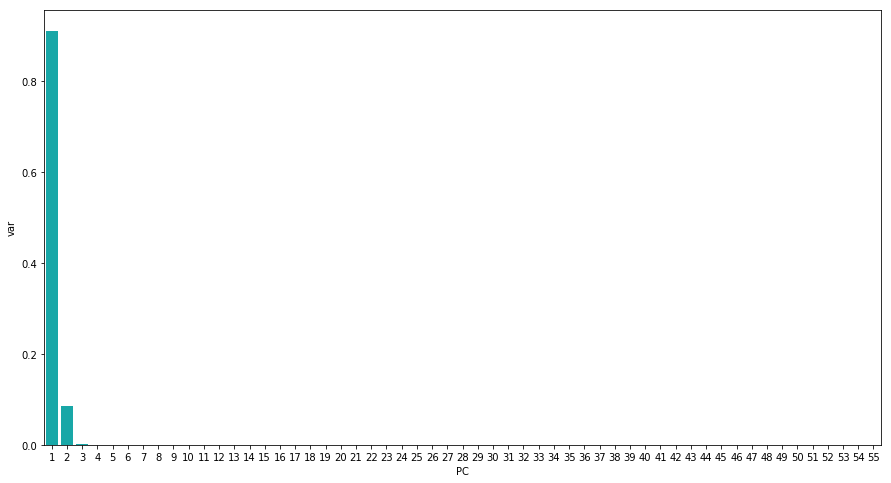

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
df_pca = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':np.arange(1,56)})
sns.barplot(x='PC',y="var", data=df_pca, color="c");

In [73]:
eigen_values = pca.explained_variance_


Text(0.5, 1.0, 'Scree plot')

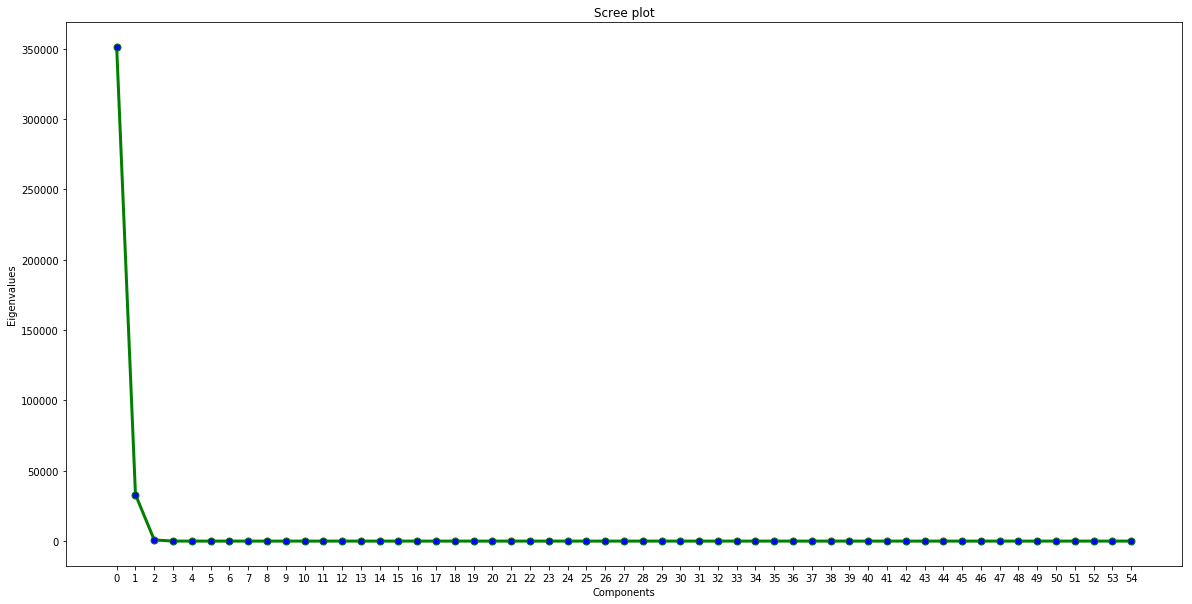

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(eigen_values,color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=7)
plt.xticks(range(0,55,1))
plt.xlabel('Components')
plt.ylabel('Eigenvalues')
plt.title('Scree plot')

### 13. Find out the accuracy , print out the Confusion Matrix.   

In [ ]:
# Compare observed value and Predicted value


In [75]:
# Calculate accuracy , print out the Confusion Matrix 
y_pred4 = model4.predict(X_test_pca)
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       804
           1       0.93      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [76]:
tn,fp,fn,tp = confusion_matrix(y_test4,y_pred4).ravel()
print(tp,fp)
print(fn,tn)

516 35
61 769
